# Ryan Cardenas - Broken String coding challenge.

## Introduction

Using the results from this report, I have answered the following questions below:

#### 1) Which of the samples are likely to be controls or treated?

Samples which are like to be:
    
    Controls:
    Samples 1, 2, 4, 5, 6, 7 and 8. As they have no AsiSI DSB regions.
    Sample3 is also probably a Control.
    
    Treated:
    Sample 10, 12, 13, 14, 15, 16. (Probably Sample 9 and 11 also)

#### 2) Are there any you are uncertain of?

  Samples 3, 9 and 11.

#### 3) Can you explain the samples in the uncertain group?

  Sample 3 I think is a Control sample, as it has only 1 AsiSI region, and the normalised counts at this region are pretty low. Therefore, there is a chance that an enodgenous DSB within this region has occured.

  I am unsure about Samples 9 and 10 because when plotting the number of AsiSI DSB regions VS total_read_counts, these two sample did not conform with Samples I think were definitely treated with AsiSI.
  In addition, when Sample 9 and Sampl10 were clustered using PCA, along the PC2 axis we could observe that Samples 9 and 10, appeared different from the Samples we were sure were Treated.
  I however still think that these samples have been treated with the AsiSI drug given the number of AsiSI normalised counts and DSB regions identified.

#### 4) Of all the possible AsiSI sites described in the chr21_AsiSI_sites.t2t.bed file what is the maximum percentage observed in a single sample?

  This highest percentage was 8.5% in samples 11 and 15.

## Results

### Sample summary statistics

#### Summary statistics dataframe

Below shows a snapshot of the dataframe produced by the Nextflow pipeline. This dataframe outlines summary statistics by sample.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Adding labels to scatter plot method
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

# Count the number of lines in the AsiSI bed file.
with open('data/chr21_AsiSI_sites.t2t.bed', 'r') as bed_asi:
    xasi_line_count = len(bed_asi.readlines())

# Load in sample level summary statistics
df = pd.read_csv('results/collated_counts/per_sample_summary_statistics.csv').sort_values('#sample_id')
# calculate percentage of AsiSI sites covered
df['percentage_AsiSI_sites_covered'] = (df['number_of_DSB_regions'] / xasi_line_count) * 100
df['index'] = df.index

df

,#sample_id,normalised_DSB_counts,number_of_DSB_regions,total_read_counts,percentage_AsiSI_sites_covered,index
10,Sample1,0.00,0,7.774,0.000000,10
3,Sample10,3.38,4,2.961,5.633803,3
0,Sample11,4.82,6,2.076,8.450704,0
13,Sample12,2.19,3,2.283,4.225352,13
2,Sample13,1.23,2,1.628,2.816901,2
1,Sample14,1.96,5,3.564,7.042254,1
12,Sample15,3.09,6,4.858,8.450704,12
9,Sample16,3.37,5,5.347,7.042254,9
15,Sample2,0.00,0,10.361,0.000000,15
4,Sample3,0.27,1,3.734,1.408451,4


#### Plot total number of reads

We can quickly see that the samples 1,2,4,5,6,7,8 have 0 AsiSI DSBs. This suggests that these samples are likely to be from the control group.

Sample 3 also has quite a low DSB count, which may also suggest that this sample is also a control and the DSB breaks at the AsiSI site has potentially occured by chance.

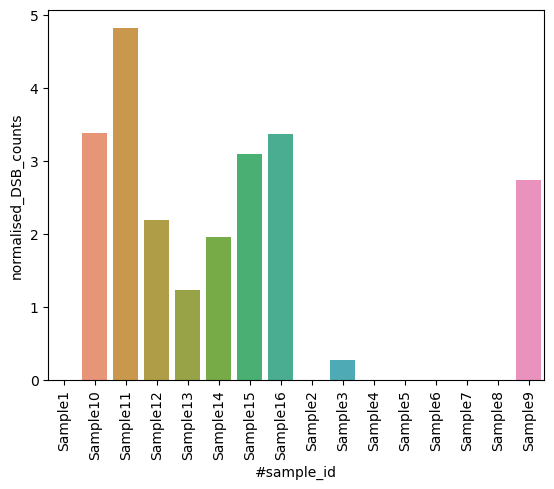

In [3]:

sns.barplot(x='#sample_id',y='normalised_DSB_counts',data=df)
plt.xticks(rotation ='vertical')
plt.show()



#### Plot Number of DSB regions

Here we have plotted the number of unique AsiSI DSB regions across samples.

Again we can see observe that Sample3 has only 1 AsiSI DSB regions and Sample13 only has 2 regions, suggesting these Samples may not have been treated.

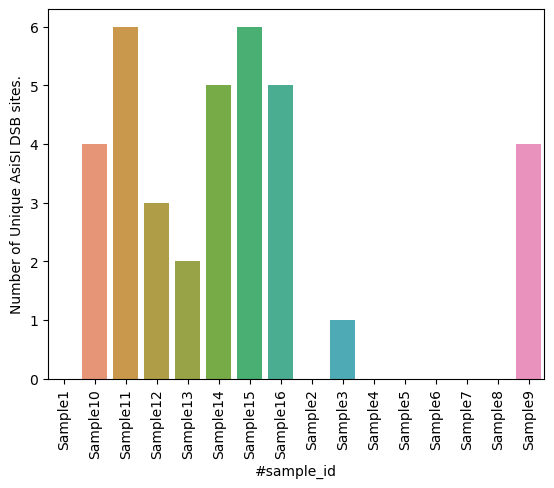

In [4]:

sns.barplot(x='#sample_id',y='number_of_DSB_regions',data=df)
plt.xticks(rotation ='vertical')
plt.ylabel('Number of Unique AsiSI DSB sites.')
plt.show()


#### Regression - number of DSB regions VS total_read_counts

Here I have plotted the total_read_count (raw - unnormalised) to the number of AsiSI DSB regions. I have used unnormalised counts, as to make the analysis as unbiased as possible. We would expect that the AsiSI treated samples should have a clear relationship between the number of AsiSI DSB regions detected and the sequencing depth of the sample. 

Here we can see quite nicely that Samples 13, 12, 10, 14 and 15 form a straight line showing as near perfect correlation (ρ = 0.99, p < 0.001). 

This analysis highlights Sample9 and Sample11 to be different from AsiSI samples - and therefore I am less confident they have been treated.

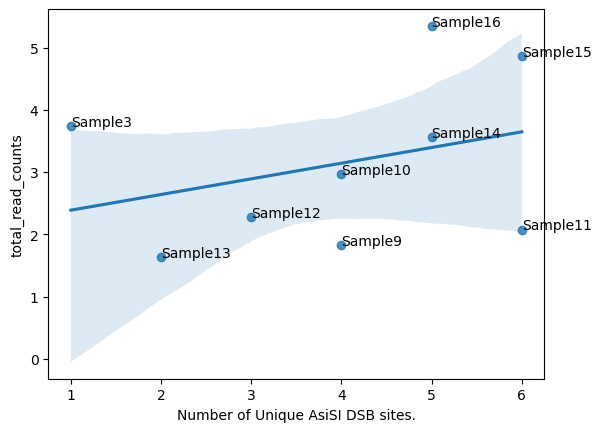

In [5]:
from scipy.stats import spearmanr
df_filtered = df.loc[df['number_of_DSB_regions'] > 0].reset_index()

ax=sns.regplot(data=df_filtered, x="number_of_DSB_regions", y="total_read_counts")
for i, txt in enumerate(df_filtered['#sample_id']):
    ax.text(df_filtered['number_of_DSB_regions'][i], df_filtered['total_read_counts'][i], txt)

plt.xlabel('Number of Unique AsiSI DSB sites.')
plt.show()


df_filtered_by_nice_samples = df_filtered[df_filtered['#sample_id'].isin(['Sample13','Sample12','Sample10','Sample15','Sample14'])]
rho, p = spearmanr(df_filtered_by_nice_samples['number_of_DSB_regions'], df_filtered_by_nice_samples['total_read_counts'])


### Analysing samples by region - PCA

#### Summary statistics by DSB region dataframe

Finally, I have also created summary statistics for each AsiSI genomic region. With this I have performed a principle component analysis, using the normalised counts at each region for every sample. 
I have removed samples and regions which have 0 normalised counts.

The dataframe is shown below.

In [6]:
from sklearn.decomposition import PCA

df_per_region = pd.read_csv('results/collated_counts/per_region_summary_statistics.csv').set_index('#sample_id')
# filter regions which have no counts
df_per_region_select = df_per_region[df_per_region['normalised_count'] > 0 ]
df_per_region_select = df_per_region_select[['position_id', 'normalised_count']]

df_per_region_select

,position_id,normalised_count
#sample_id,,
Sample11,chr21_30241529_30241530,1.445087
Sample11,chr21_30241532_30241533,0.963391
Sample11,chr21_35748756_35748757,0.481696
Sample11,chr21_35748757_35748758,0.481696
Sample11,chr21_35748760_35748761,0.481696
Sample11,chr21_43162146_43162147,0.963391
Sample14,chr21_19360517_19360518,0.280584
Sample14,chr21_30241529_30241530,0.841751
Sample14,chr21_30241532_30241533,0.280584


#### Variance explained (PCA)

Given the result below, I have chosen to investigate PC1-3.

In [7]:

long_df = df_per_region_select.pivot_table(index='#sample_id', columns=['position_id'], values=['normalised_count'], fill_value=0)
long_array = long_df.to_numpy()

# Apply PCA 
pca = PCA()
pca.fit_transform(long_array)
# Extract the variance explained from the 
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["Vairance_Explained"])

df_var_explained = expVar.round(2)
df_var_explained['Principle component'] = df_var_explained.index + 1

df_var_explained


,Vairance_Explained,Principle component
0,47.04,1
1,30.27,2
2,11.96,3
3,7.02,4
4,2.34,5
5,1.20,6
6,0.11,7
7,0.06,8
8,0.00,9


#### PC1 vs PC2

PC1 doesnt not appear to give much indication of a pattern across samples. 

In contrast, for PC2 we observe that Samples 11 and 9 are seperated from all the other samples this suggesting there are difference between these two samples and the rest.

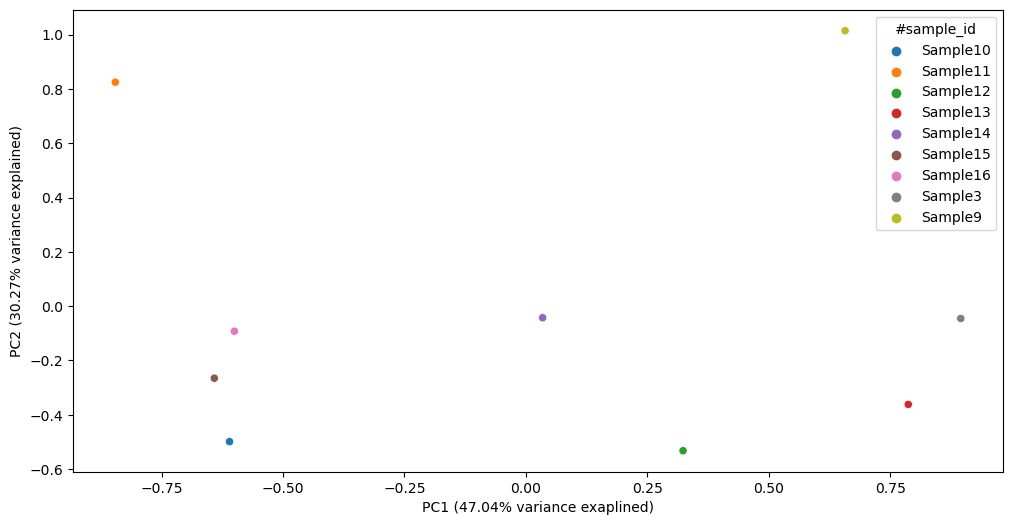

In [8]:

pca = PCA(n_components=3)
pca_X_n2 = pca.fit_transform(long_array)
variance_explained = list(pca.explained_variance_ratio_*100)
variance_explained = [ round(elem,2) for elem in variance_explained ]
componentsDf = pd.DataFrame(data = pca_X_n2, columns = ['PC1', 'PC2', 'PC3'])

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=componentsDf, x=f"PC1", y=f"PC2", hue=long_df.index)
plt.xlabel(f"PC1 ({variance_explained[0]}% variance exaplined)")
plt.ylabel(f"PC2 ({variance_explained[1]}% variance explained)")
plt.show()




